In [ ]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [ ]:
# connect to google drive
in_colab = False
try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir("/content/drive/My Drive/Capstone/Project_1")  
    in_colab = True
except:
    pass

Mounted at /content/drive


In [ ]:
# loading the cpi monthly data
cpi_df = pd.read_excel("Data/CPI_Monthly.xlsx") 

In [ ]:
cpi_df.head()

,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Avg,Dec-Dec,Avg-Avg
0,2,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,9.9,–,–
1,3,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,10.0,1.0,1.0
2,4,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,10.1,2.0,1.0
3,5,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,10.9,12.6,7.9
4,6,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,12.8,18.1,17.4


111

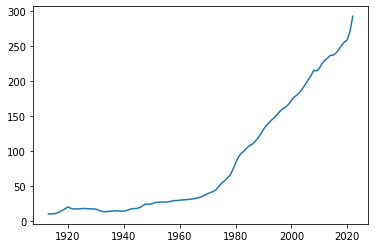

In [ ]:
plt.plot(cpi_df.Year, cpi_df.Avg)

In [ ]:
cpi_df = cpi_df.drop(['Unnamed: 0', 'Dec-Dec', 'Avg-Avg', 'Avg'], axis = 1)
cpi_df = cpi_df.drop(110, axis = 0)
cpi_df

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1913,9.8,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000
1,1914,10.0,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100
2,1915,10.1,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300
3,1916,10.4,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600
4,1917,11.7,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802


In [ ]:
cpi_dict = {}

for arow in cpi_df.iterrows():
  temp_df = arow[1]
  for id in range(1, len(temp_df.values)):
    cpi_dict[str(temp_df.values[0]) +'-' + str(temp_df.keys()[id])] = temp_df.values[id]

In [ ]:
cpi_df_cont = pd.DataFrame(list(zip(cpi_dict.keys(), cpi_dict.values())), columns = ['TimeStamp', 'CPI'])

In [ ]:
cpi_change = [float(cpi_df_cont.CPI[id]) - float(cpi_df_cont.CPI[id - 1]) for id in range(1, len(cpi_df_cont.CPI))]

In [ ]:
cpi_df_cont['CPI'] = cpi_df_cont['CPI'].astype(float)
cpi_df_cont['Prev_CPI'] = cpi_df_cont['CPI'].shift(1)
cpi_df_cont['Prev_CPI'] = cpi_df_cont['Prev_CPI'].astype(float)

In [ ]:
cpi_df_cont['Change'] = cpi_df_cont['CPI'] - cpi_df_cont['Prev_CPI']
cpi_df_cont

,TimeStamp,CPI,Prev_CPI,Change
0,1913-Jan,9.800,NaN,NaN
1,1913-Feb,9.800,9.800,0.000
2,1913-Mar,9.800,9.800,0.000
3,1913-Apr,9.800,9.800,0.000
4,1913-May,9.700,9.800,-0.100
...,...,...,...,...
1315,2022-Aug,296.171,296.276,-0.105
1316,2022-Sep,296.808,296.171,0.637
1317,2022-Oct,298.012,296.808,1.204
1318,2022-Nov,297.711,298.012,-0.301


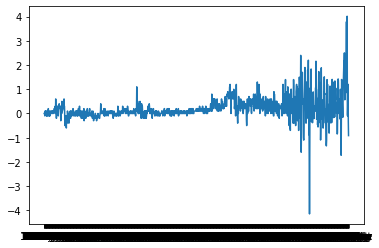

In [ ]:
plt.plot(cpi_df_cont['TimeStamp'], cpi_df_cont['Change'])

#### Test for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(cpi_df_cont.Change[1: ])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.676679
p-value: 0.443166
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:
cpi_df_cont.to_excel("Data/CPI_Monthly_Change.xlsx")

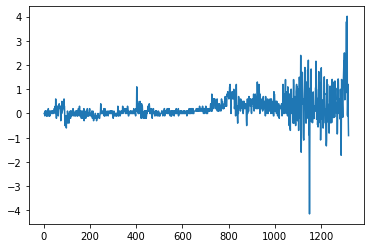

In [ ]:
cpi_df_cont['Change'].plot()

In [ ]:
cpi_df_cont['rolling_3months_avg'] = cpi_df_cont.Change.rolling(3).mean()

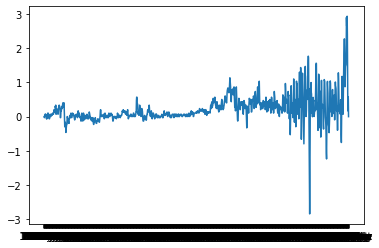

In [ ]:
plt.plot(cpi_df_cont['TimeStamp'], cpi_df_cont['rolling_3months_avg'])

In [ ]:
result = adfuller(cpi_df_cont.rolling_3months_avg[4: ])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.073922
p-value: 0.255129
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
